# Import the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Inseption

In [2]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [3]:
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [4]:
test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [5]:
train.shape,test.shape

((245725, 11), (105312, 10))

* __we have 245725 rows and 11 columns in train set whereas test set has 105312 roes and 10 columns.__

In [6]:
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [7]:
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

 * __we have  11% of missing values in credit_product.__

In [8]:
# categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [9]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


# Data Cleaning

In [10]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [12]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(29325, 12522)

In [13]:
print(train['Credit_Product'].value_counts())
print('******************************************')
print(test['Credit_Product'].value_counts())

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
******************************************
No     61608
Yes    31182
Name: Credit_Product, dtype: int64


In [14]:
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [15]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(0, 0)

# Exploratory Data Analysis

In [16]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [17]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [18]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

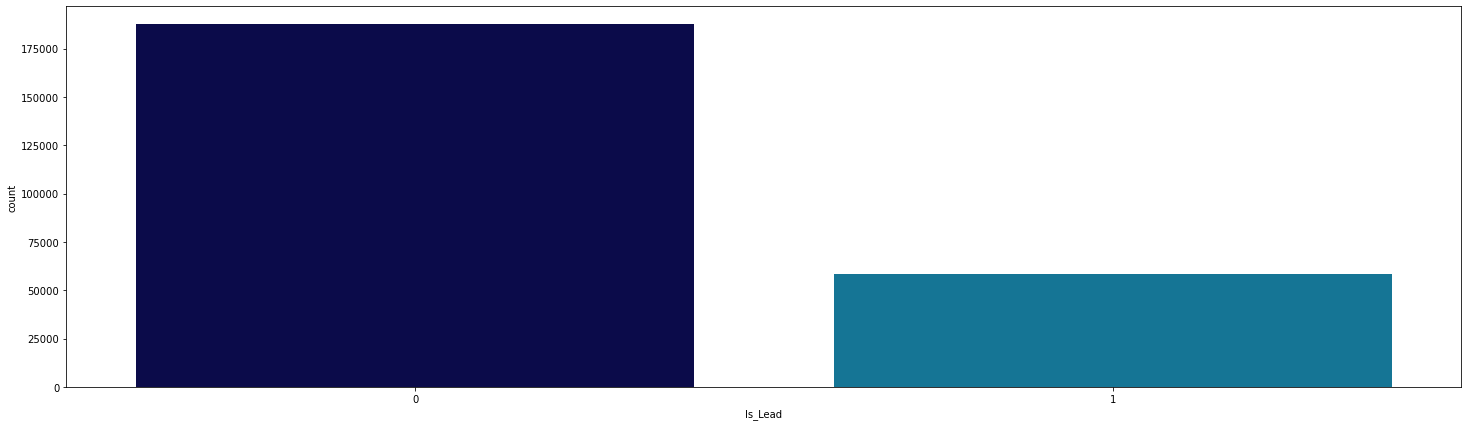

In [19]:
plt.figure(figsize=(25,7))
sns.countplot('Is_Lead',data=train,palette='ocean')

# Building Model

In [20]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [21]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

*__Encoding the required columns frm traingng and test dataset.__

In [22]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [23]:
# seperate features and target
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']

In [24]:
# 20% data as validation set(test set)
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

# Data preprocessing

In [25]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)


(196580, 10)
(49145, 10)
(196580,)
(49145,)


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
Scale=StandardScaler()
x_train_std=Scale.fit_transform(X_train)
x_valid_std=Scale.transform(X_valid)

In [28]:
norm=lambda a:(a-min(a))/(max(a)-min(a))

In [29]:
df_norm=train.iloc[:,:-1]

In [30]:
df_normalized=df_norm.apply(norm)

In [31]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,random_state=0)

In [32]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(196580, 10)
(49145, 10)
(196580,)
(49145,)


**Data is mostly numerical and in such scenario , Logistic Regression works fine. We seen variables are depending on target somewhat linearly, So this is also good for Logistic Regression. I will be also using  Random Forest (Ensemble Learning),KNN,XGB classifier  to see if i can improve accuracy. Note these learning algorithm also works on linear data very well. To validate model i will be using train test split, for accuracy i will be considering ROC Curve and ROC AUC Score to make sure Type 2 Error will not occur for Positive class, that is 1**

**KNN With standard scaling**

In [33]:
##knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_valid_std)

Model Validation ==>

Accuracy Score of KNN Model::
0.7813205819513684

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     37458
           1       0.60      0.25      0.35     11687

    accuracy                           0.78     49145
   macro avg       0.70      0.60      0.61     49145
weighted avg       0.75      0.78      0.75     49145
 


 ROC Curve


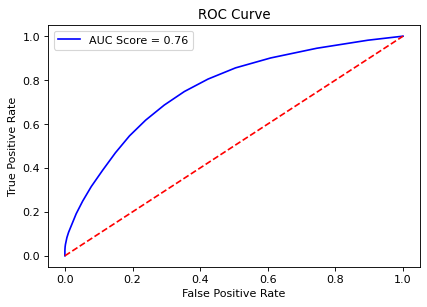

In [34]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_valid,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_valid,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(x_valid_std)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_valid,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**KNN with  Normalization**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_norm = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model_norm.fit(x_train_norm,y_train_norm)
knn_pred_norm=knn_model_norm.predict(x_test_norm)

Model Validation ==>

Accuracy Score of KNN Model with Normalization::
0.783497812595381

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     37511
           1       0.60      0.26      0.36     11634

    accuracy                           0.78     49145
   macro avg       0.70      0.60      0.61     49145
weighted avg       0.76      0.78      0.75     49145
 


 ROC Curve


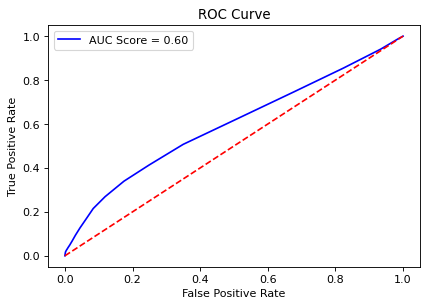

In [36]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model with Normalization::")
print(metrics.accuracy_score(y_test_norm,knn_pred_norm))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,knn_pred_norm),'\n')
print("\n","ROC Curve")
knn_prob_norm=knn_model.predict_proba(x_test_norm)
knn_prob_norm1=knn_prob_norm[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,knn_prob_norm1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**ENSEMBLE LEARNING(RF)**

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_valid_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.7822158917489063

 Classification Report::
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     37458
           1       0.58      0.29      0.39     11687

    accuracy                           0.78     49145
   macro avg       0.70      0.61      0.63     49145
weighted avg       0.76      0.78      0.75     49145
 


 ROC Curve


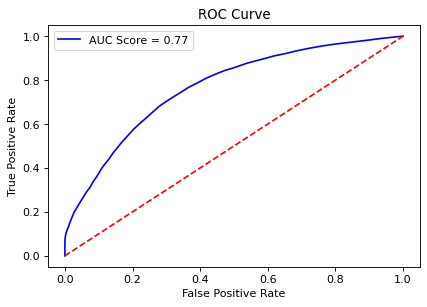

In [38]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_valid,rf_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_valid,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(x_valid_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_valid,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**logistic regression**

In [39]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_valid_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.7546851154746159

 Classification Report::
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     37458
           1       0.43      0.10      0.16     11687

    accuracy                           0.75     49145
   macro avg       0.60      0.53      0.51     49145
weighted avg       0.69      0.75      0.69     49145
 


 ROC Curve


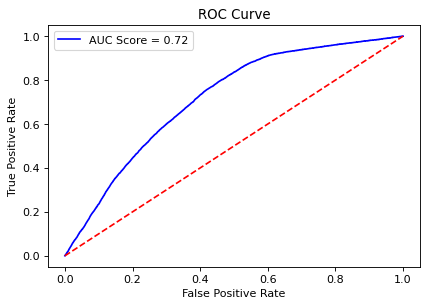

In [40]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_valid,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_valid,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(x_valid_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_valid,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


**XGB classifier**

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
xgb.fit(x_train_std, y_train)
xgb_pred = xgb.predict(x_valid_std)

[11:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model Validation ==>

Accuracy Score of XGB Model::
0.7899481127276426

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     37458
           1       0.71      0.20      0.31     11687

    accuracy                           0.79     49145
   macro avg       0.75      0.59      0.59     49145
weighted avg       0.77      0.79      0.74     49145
 


 ROC Curve


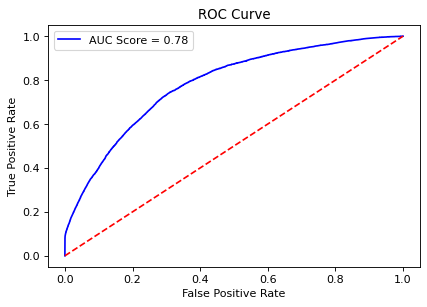

In [43]:
print("Model Validation ==>\n")
print("Accuracy Score of XGB Model::")
print(metrics.accuracy_score(y_valid,xgb_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_valid,xgb_pred),'\n')
print("\n","ROC Curve")
xgb_prob=xgb.predict_proba(x_valid_std)
xgb_prob1=xgb_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_valid,xgb_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [44]:
## predicting the values by RandomForestClassifier model because ROC curve of RF modelis better when compared with other models  .
submission = pd.read_csv('sample_submission_8RXa3c6.csv')
final_predictions = rf_model.predict(test)
submission['Is_Lead '] = final_predictions
#only positive predictions for the target variable
submission['Is_Lead'] = submission['Is_Lead'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

In [45]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')
model =RandomForestClassifier()
model.fit(X, y)
final_predictions = model.predict(test)
submission['Is_Lead'] = final_predictions
#only positive predictions for the target variable
submission['Is_Lead'] = submission['Is_Lead'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)